<a href="https://colab.research.google.com/github/redadmiral/python-for-journalists/blob/main/Scraper_Beautiful_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping mit Beautiful Soup

Wenn wir keine offene API finden können, bleibt uns nur die Seite direkt zu scrapen. Dafür laden wir uns den HTML-Code herunter und benutzen die Bibliothek Beautiful Soup um an die Inhalte zu gelangen die wir brauchen.

Dafür müssen wir zuerst die Bibliothek importieren. Wir benutzen außerdem wieder die requests-Bibliothek, um die Internetseiten herunterzuladen:

In [6]:
from bs4 import BeautifulSoup
import requests

Aus der Bibliothek `bs4`, also Beautiful Soup 4, benutzen wir nur die Klasse `BeautifulSoup`. Das drücken wir mit der Syntax in der ersten Zeile aus. `requests` importieren wir ganz normal.

Als Beispiel habe ich eine Seite gewählt, die ergänzende Informationen zu Hunderassen hat. Auf der Seite [zooplus.de](https://www.zooplus.de/magazin/hund/hunderassen) werden verschiedene Tiere vorgestellt, unter anderem auch eine Anzahl an Hunderassen.

Diese werden in verschiedenen Kategorien bewertet, wie etwa der Neigung zu beißen: 

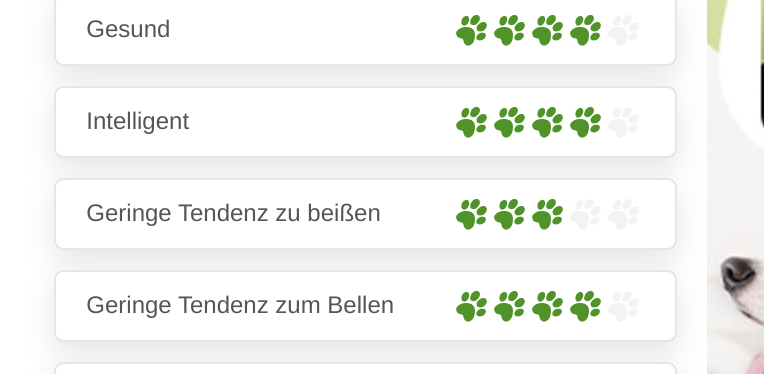

Um an diese Informationen für alle Hunde zu kommen, laden wir uns zuerst die Übersichtsseite über alle Hunderassen herunter.

In [52]:
response = requests.get("https://www.zooplus.de/magazin/hund/hunderassen")

Wenn wir das Dokument ausgeben, sehen wir dass es sich um ein HTML-Dokument handelt.



In [45]:
response.content.decode("utf-8")

'<!doctype html>\n<html lang="de">\n\n<head>\n\t<meta charset="utf-8" />\n\t<meta http-equiv="x-ua-compatible" content="ie=edge" />\n\t<meta property="fb:pages" content="123279578696" />\n\t<meta name="apple-mobile-web-app-capable" content="yes" />\n\t<meta name="apple-mobile-web-app-status-bar-style" content="#3c9700" />\n\t<meta name="twitter:dnt" content="on"> \n\t<meta name="apple-mobile-web-app-capable" content="yes"/>\n\t<meta name="apple-mobile-web-app-status-bar-style" content="#3c9700"/>\n\t<meta name="theme-color" content="#3c9700" />\n\t<meta name="HandheldFriendly" content="true" />\n\n\t<link rel="apple-touch-icon" href="https://www.zooplus.de/magazin/wp-content/themes/wpzp/assets/img/zooplus-Icon-180x180.png" />\n\n\t<link rel="shortcut icon" href="https://www.zooplus.de/magazin/wp-content/themes/wpzp/assets/favicon.ico" />\n\n\t<meta name="viewport" content="width=device-width,  initial-scale=1, maximum-scale=5" />\n\n\t<meta name=\'robots\' content=\'index, follow, max-

Ganz grundlegend hat jedes HTML-Dokument eine hierarchische Struktur, die über sogenannte Tags definiert ist. Ein Tag wird in <> Klammern geschrieben. 

```html
<html>
```

Es gibt zwei Arten von Tags: Öffnende und Schließende Tags. Die schließenden Tags sind durch einen Schrägstrich gekennzeichnet.

```html
<html>
</html>
```

Zwischen diesen beiden Tags können andere HTML-Tags eingesetzt werden, die verschiedene Eigenschaften mit sich bringen. Das \<body>\</body>-Tag zeigt etwa an, das hier der Hauptteil des Dokuments beginnt. 

In diesem Body-Tag können dann andere Tags stehen, die den Text auszeichnen. 

Die wichtigsten Tags sind:

- \<h1-6> geben an, dass es sich hier um eine Überschrift handelt
- \<p> steht für Paragraph und behinhaltet Text
- \<div> ist ein unsichtbarer Tag, der für die Strukturierung und das Styling verwendet wird.
- \<a> sind Links. Die URL steht im `href`-Attribut

Der Browser rendert die HTML-Tags dann. Aus dem folgenden HTML-Code

```html
<!DOCTYPE html>
<html lang="en">
  <body>
    <h1> Überschrift </h1>
    <p> Das hier ist Text. </p>
    <p> Das hier ist Text mit einem <a href="example.com">Link</a>. </p>
  </body>
</html>
```

Macht der Browser dann das hier:

<body>
    <h1> Überschrift </h1>
    <p> Das hier ist Text. </p>
    <p> Das hier ist Text mit einem <a href="example.com">Link</a>.</p>
</body>

Diesen HTML-Code übergeben wir dann an die `BeautifulSoup`-Klasse, damit wir darin navigieren können:

In [53]:
soup = BeautifulSoup(response.content.decode("utf-8"))

In den Entwicklertools (F12 in Chrome und Firefox) können wir uns die Struktur der Seite anzeigen lassen, von der wir scrapen wollen.

Die Tags haben oft noch Klassenattribute `class`, die uns dabei helfen, die richtigen Tags mit dem Inhalt zu finden, die wir haben wollen.

Auf der Übersichtsseite sind zum Beispiel alle geführten Hunderassen aufgeführt. Wir wollen uns die Links zu den Unterseiten ziehen, damit wir diese scrapen können.

Dafür identifizieren wir in den Entwicklertools zuerst den "Wrapper", das ist das Element der Seite, in dem alle Links aufgeführt sind.

In den Entwicklertools sehen wir, dass es sich dabei um ein `section`-Element handelt, dass die Klasse `breed-selector__breed-article-wrapper` hat.

Mit der `find()`-Funktion können wir das Element finden und in einer neuen Variable `wrapper` speichern.

In [ ]:
wrapper = soup.find("section", {"class": "breed-selector__breed-article-wrapper"})
wrapper.contents

Hier ist immer noch ziemlich viel los, in den Entwicklertools können wir nun die einzelnen Links identifizieren. Diese sind mit dem \<a>-Tag ausgezeichnet und haben die Klasse `breed-selector__breed-article-visible`. Wir speichern sie in eine Variable `links`.

In [ ]:
links = wrapper.find_all("a", {"class": "breed-selector__breed-article-visible"})
links

Wir bekommen eine Liste mit den Link-Tags, aber in diesen Links ist mehr als nur die URL enthalten, die wir gerne hätten:

```html
<a class="breed-selector__breed-article breed-selector__breed-article-visible v3-box v3-box--white" href="https://www.zooplus.de/magazin/hund/hunderassen/zwergspitz">
 <div class="breed-selector__breed-article-header">
 <img alt="zwergspitz hund in wohnzimmer" class="breed-selector__breed-image" data-url="https://www.zooplus.de/magazin/wp-content/uploads/2017/06/zwergspitz-wohnung-768x512.jpg" height="210" loading="lazy" src="" width="310"/>
 <h2 class="breed-selector__breed-article-title">Zwergspitz</h2>
 <div class="breed-selector__breed-article-gradient"></div>
 </div>
 <ul class="breed-selector__breed-article-attributes">
 <li class="breed-selector__breed-article-attribute">
 <div class="v5-icon--heart-mid breed-selector__breed-article-icon"></div>
 <p>Pflegeleichtes Fell, Wohnungshund, Leicht erziehbar, Als erster Hund geeignet...</p>
 </li>
 <li class="breed-selector__breed-article-attribute">
 <div class="v5-icon--dog-cloths-mid breed-selector__breed-article-icon"></div>
 <p>Extra Klein, Langhaar, Schwarz, Orange / Mahagoni, Blau / Silber...</p>
 </li>
 </ul>
 </a>
```

Für uns ist nur die URL wichtig, die im `href`-Attribut in der ersten Zeile steht. Auf dieses Attribut können wir wie auf einen Key in einem Dictionary zugreifen:

In [56]:
links[0]["href"]

'https://www.zooplus.de/magazin/hund/hunderassen/affenpinscher'

Um das auf der ganzen Liste zu machen gehen wir mit einer `for`-Schleife über die Liste:

In [57]:
for a in links:
  a["href"]

KeyError: ignored

Doch wir bekommen eine Fehlermeldung. Das liegt daran, dass es anscheinend \<a>-Tags gibt, die kein `href`-Attribut besitzen. 

Deshalb müssen wir den Fehler fangen, das funktioniert mit einem `try`/`except`-Clause.

Dieses Konstrukt sagt: Versuche das Eine, und wenn es nicht klappt, dann mach etwas anderes.

Wir wollen, dass Python den Fehler einfach ignoriert und in der for-Schleife weitermacht. Dafür gibt es den `continue`-Befehl.

In [59]:
for a in links:
  try:
    a["href"]
  except KeyError:
    continue

Damit läuft unser Befehl ohne Probleme durch. Nun müssen wir die Links nur noch in einer Liste abspeichern, damit wir nachher damit arbeiten können.

In [58]:
urls = []

for a in links:
  try:
    urls.append(a["href"])
  except KeyError:
    continue

urls

['https://www.zooplus.de/magazin/hund/hunderassen/affenpinscher',
 'https://www.zooplus.de/magazin/hund/hunderassen/afghanischer-windhund',
 'https://www.zooplus.de/magazin/hund/hunderassen/airedale-terrier',
 'https://www.zooplus.de/magazin/hund/hunderassen/akita-inu',
 'https://www.zooplus.de/magazin/hund/hunderassen/alaskan-husky',
 'https://www.zooplus.de/magazin/hund/hunderassen/alaskan-malamute',
 'https://www.zooplus.de/magazin/hund/hunderassen/alopekis',
 'https://www.zooplus.de/magazin/hund/hunderassen/altdeutscher-schaeferhund',
 'https://www.zooplus.de/magazin/hund/hunderassen/american-akita',
 'https://www.zooplus.de/magazin/hund/hunderassen/american-bulldog',
 'https://www.zooplus.de/magazin/hund/hunderassen/american-bully',
 'https://www.zooplus.de/magazin/hund/hunderassen/american-cocker-spaniel',
 'https://www.zooplus.de/magazin/hund/hunderassen/american-foxhound',
 'https://www.zooplus.de/magazin/hund/hunderassen/american-pit-bull-terrier',
 'https://www.zooplus.de/mag

Wir wollen jetzt alle URLs einmal aufrufen, um uns die Information herunterzuladen, wie gerne der Hund beißt. 

Den Code dafür entwickeln wir aber zuerst anhand eines einzelnen Beispiels. Dafür speichern wir die erste URL aus der Liste in einer Variable `url` ab:

In [60]:
url = urls[0]

Dann rufen wir die URL ab und übergeben sie wieder an `BeautifulSoup`:

In [61]:
url = urls[0]

response = requests.get(url)

soup = BeautifulSoup(response.content.decode("utf-8"))

Aus den Entwicklertools wissen wir, dass alle Einträge, auch die Beißfreudigkeit, in einer Sidebar sind. Diese besteht aus einem \<div>-Element mit der Klasse `breed-selector-article-sidebar--characteristics-wrapper`. Wir speichern sie in eine Variable `characteristics`.

In [ ]:
characteristics = soup.find("div", {"class": "breed-selector-article-sidebar--characteristics-wrapper"})

Außerdem finden wir den Eintrag den wir suchen als `<p>`-Tag, aber ohne Klassenattribut. Deshalb müssen wir uns nach dem Inhalt des Tags orientieren. Das funktioniert über das `string`-Attribut.

In [62]:
characteristics.find("p", string="Geringe Tendenz zu beißen")

<p>Geringe Tendenz zu beißen</p>

Hier fehlt uns aber noch die Bewertung. Nachdem wir aber wissen, dass HTML-Dokumente immer geschachtelt aufgebaut sind, können wir mit der `.parent()`-Methode eine Ebene höher gehen und uns ansehen, was wir dort alles finden:

In [63]:
characteristics.find("p", string="Geringe Tendenz zu beißen").parent()

[<p>Geringe Tendenz zu beißen</p>,
 <div class="breed-characterestics-value-wrapper">
 <span class="v5-icon--paw v5-icon active-paw"></span>
 <span class="v5-icon--paw v5-icon "></span>
 <span class="v5-icon--paw v5-icon "></span>
 <span class="v5-icon--paw v5-icon "></span>
 <span class="v5-icon--paw v5-icon "></span>
 <span class="sr-only">Sehr schwach ausgeprägt (1 von 5 Pfoten)</span> </div>,
 <span class="v5-icon--paw v5-icon active-paw"></span>,
 <span class="v5-icon--paw v5-icon "></span>,
 <span class="v5-icon--paw v5-icon "></span>,
 <span class="v5-icon--paw v5-icon "></span>,
 <span class="v5-icon--paw v5-icon "></span>,
 <span class="sr-only">Sehr schwach ausgeprägt (1 von 5 Pfoten)</span>]

Hier sehen wir, dass sich die Bewertung in einem `span`-Element mit der Klasse `sr-only` verbirgt. Wir sehen außerdem, dass sich die von uns gesuchte Information im zweiten Element der Liste versteckt. Also suchen wir im zweiten Listenelement nach dem span mit der korrekten Klasse:

In [64]:
characteristics.find("p", string="Geringe Tendenz zu beißen").parent()[1].find("span", {"class": "sr-only"})

<span class="sr-only">Sehr schwach ausgeprägt (1 von 5 Pfoten)</span>

Jetzt holen wir uns mit dem `.contents`-Attribut noch den Inhalt des `span`-Tags:

In [66]:
characteristics.find("p", string="Geringe Tendenz zu beißen").parent()[1].find("span", {"class": "sr-only"}).contents[0]

'Sehr schwach ausgeprägt (1 von 5 Pfoten)'

Jetzt wo wir den ganzen Code beisammen haben, um ihn auf alle URLs anzuwenden, können wir einen for-Loop über die Liste `links` schreiben.

Da wir die Seite nicht zu sehr beanspruchen wollen, begrenzen wir aber die Liste mit Links auf die ersten fünf Einträge.

In [68]:
urls = urls[:5]
urls

['https://www.zooplus.de/magazin/hund/hunderassen/affenpinscher',
 'https://www.zooplus.de/magazin/hund/hunderassen/afghanischer-windhund',
 'https://www.zooplus.de/magazin/hund/hunderassen/airedale-terrier',
 'https://www.zooplus.de/magazin/hund/hunderassen/akita-inu',
 'https://www.zooplus.de/magazin/hund/hunderassen/alaskan-husky']

Also kopieren wir den Code von oben in einen `for`-Loop und speichern das Ergebnis aus dem letzten Befehl in einer Liste, die wir `bityness` nennen.

Außerdem fügen wir ein `sleep`-Statement aus der `time`-Bibliothek ein, damit wir dem Server ein bisschen Pause gönnen und geben uns in jedem Durchlauf aus, welche URL gerade verarbeitet wird, damit wir sehen dass hier auch was passiert.

In [70]:
from time import sleep

bityness = []

for url in urls:
  print(f"Retrieve {url}")
  response = requests.get(url)

  soup = BeautifulSoup(response.content.decode("utf-8"))

  characteristics = soup.find("div", {"class": "breed-selector-article-sidebar--characteristics-wrapper"})
  bityness.append(characteristics.find("p", string="Geringe Tendenz zu beißen").parent()[1].find("span", {"class": "sr-only"}).contents[0])
  sleep(1)
  
bityness

Retrieve https://www.zooplus.de/magazin/hund/hunderassen/affenpinscher
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/afghanischer-windhund
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/airedale-terrier
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/akita-inu
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/alaskan-husky


['Schwach ausgeprägt (2 von 5 Pfoten)',
 'Schwach ausgeprägt (2 von 5 Pfoten)',
 'Mittelmäßig ausgeprägt (3 von 5 Pfoten)',
 'Mittelmäßig ausgeprägt (3 von 5 Pfoten)',
 'Sehr schwach ausgeprägt (1 von 5 Pfoten)']

Um den Output ein bisschen übersichtlicher zu halten, verändern wir noch den Output ein wenig, so dass wir die Hunderasse zu jedem Eintrag mit abspeichern. Das machen wir, indem wir den letzten Teil der URL als Key in einem Dictionary verwenden:

In [71]:
bityness = dict()

for url in urls:
  print(f"Retrieve {url}")

  breed = url.split("/")[-1]
  response = requests.get(url)

  soup = BeautifulSoup(response.content.decode("utf-8"))

  characteristics = soup.find("div", {"class": "breed-selector-article-sidebar--characteristics-wrapper"})
  bite_likeliness = characteristics.find("p", string="Geringe Tendenz zu beißen").parent()[1].find("span", {"class": "sr-only"}).contents[0]
  bityness[breed] = bite_likeliness
  sleep(1)


bityness

Retrieve https://www.zooplus.de/magazin/hund/hunderassen/affenpinscher
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/afghanischer-windhund
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/airedale-terrier
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/akita-inu
Retrieve https://www.zooplus.de/magazin/hund/hunderassen/alaskan-husky


{'affenpinscher': 'Schwach ausgeprägt (2 von 5 Pfoten)',
 'afghanischer-windhund': 'Schwach ausgeprägt (2 von 5 Pfoten)',
 'airedale-terrier': 'Mittelmäßig ausgeprägt (3 von 5 Pfoten)',
 'akita-inu': 'Mittelmäßig ausgeprägt (3 von 5 Pfoten)',
 'alaskan-husky': 'Sehr schwach ausgeprägt (1 von 5 Pfoten)'}

# Shortcut mit Pandas

Wenn wir eine vorformatierte HTML-Tabelle von einer Website laden wollen, müssen wir sie nicht mühsam händisch scrapen sondern können Pandas das für uns erledigen lassen. 

Dafür bietet pandas uns die `read_html()`-Funktion an:

In [74]:
import pandas as pd

pd.read_html("https://de.wikipedia.org/wiki/Dackel")[0]

,Dachshund,Dachshund.1
0,NaN,NaN
1,NaN,NaN
2,FCI-Standard Nr. 148,FCI-Standard Nr. 148
3,Gruppe 4: Dachshunde Sektion 1: Dachshund Mit ...,Gruppe 4: Dachshunde Sektion 1: Dachshund Mit ...
4,Ursprung:,Deutschland
5,Alternative Namen:,"Dackel, Teckel"
6,Gewicht:,Obergrenze etwa 9 kg
7,Varietäten:,Dachshund Kurzhaar Langhaar Rauhaar Zwerg-Dach...
8,Liste der Haushunde,Liste der Haushunde


Die so gescrapten Tabellen müssen aber oft noch stark nachbearbeitet werden.